In [1]:
#import the necessary libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#read file and load top rows
df= pd.read_csv(r'D:\Data Analysis. Quantum Analytics\QA Project\Python Projects\Stores.csv')
df.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


In [3]:
df.tail()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
891,892,1582,1910,1080,66390
892,893,1387,1663,850,82080
893,894,1200,1436,1060,76440
894,895,1299,1560,770,96610
895,896,1174,1429,1110,54340


In [4]:
df.dtypes

Store ID                int64
Store_Area              int64
Items_Available         int64
Daily_Customer_Count    int64
Store_Sales             int64
dtype: object

In [5]:
df.shape

(896, 5)

In [6]:
df.isnull().sum()

Store ID                0
Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

### Total Sales

In [9]:
# Calculate total sales
total_sales = df['Store_Sales'].sum()
print("Total Sales: $", total_sales)

Total Sales: $ 53178770


### Sales by Store Area

In [11]:
# Analyze sales by store area
Top_10_sales_by_area = df.groupby('Store_Area')['Store_Sales'].sum().sort_values(ascending = False).head(10)
print("\nTop_10_sales_by_area:")
print(Top_10_sales_by_area)


Top_10_sales_by_area:
Store_Area
1440    362330
1539    345940
1439    341400
1513    311570
1458    300200
1496    263890
1766    261250
1462    252820
1365    243340
1648    241730
Name: Store_Sales, dtype: int64


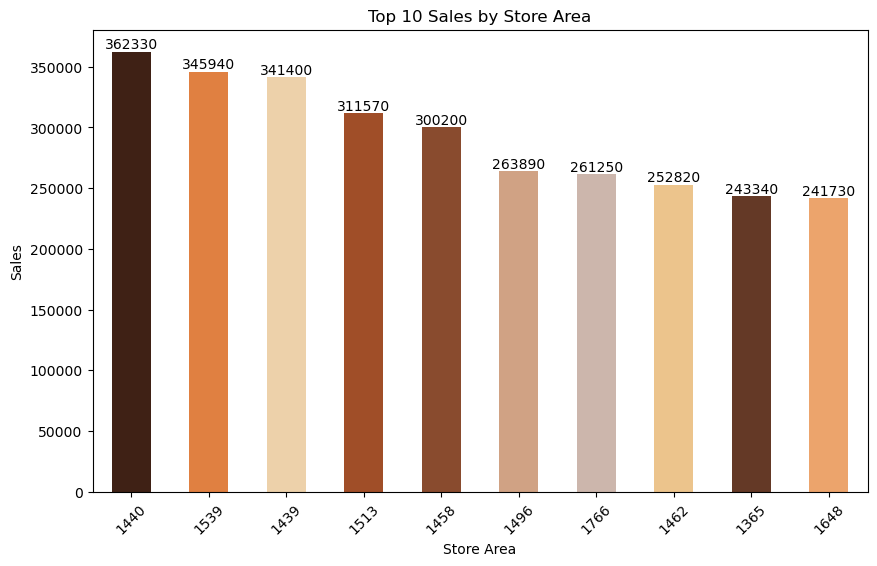

In [12]:
# Plotting the top 10 sales by store area
plt.figure(figsize=(10, 6))
ax = Top_10_sales_by_area.plot(kind='bar', color = ['#3f2115', '#e08041', '#edd1aa', '#a04e28', '#894b2e', '#d0a284', '#ccb6ac', '#ecc48c', '#643926', '#eca46c'])
plt.title('Top 10 Sales by Store Area')
plt.xlabel('Store Area')
plt.ylabel('Sales')
plt.xticks(rotation=45)

# Adding data labels
for i, v in enumerate(Top_10_sales_by_area):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.show()

### Average Daily Customer Count

In [13]:
# Calculate average daily customer count
average_customer_count = df['Daily_Customer_Count'].mean()
print("\nAverage Daily Customer Count:", average_customer_count)


Average Daily Customer Count: 786.3504464285714


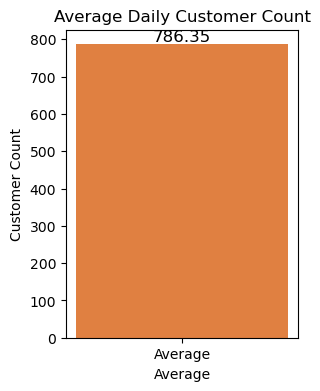

In [14]:
# Plotting the average daily customer count
plt.figure(figsize=(3, 4))
plt.bar(['Average'], [average_customer_count], color = ('#e08041'))
plt.title('Average Daily Customer Count')
plt.xlabel('Average')
plt.ylabel('Customer Count')

# Adding data label
plt.text(0, average_customer_count, str(round(average_customer_count, 2)), ha='center', va='bottom', fontsize=12)

plt.show()

### Customer Count by store Area

In [33]:
# Analyze items available by store area
top_10_by_customer_count = df.groupby('Daily_Customer_Count')['Store_Area'].sum()
# Get the top 10 results by store area
top_10_by_customer_count = customer_count_by_store.nlargest(10)
print("\ntop_10_by_customer_count")
print(top_10_by_customer_count)


top_10_by_customer_count
Daily_Customer_Count
670    27924
760    25325
680    24685
790    22943
660    22639
730    22060
620    21539
700    21494
720    21269
860    21190
Name: Store_Area, dtype: int64


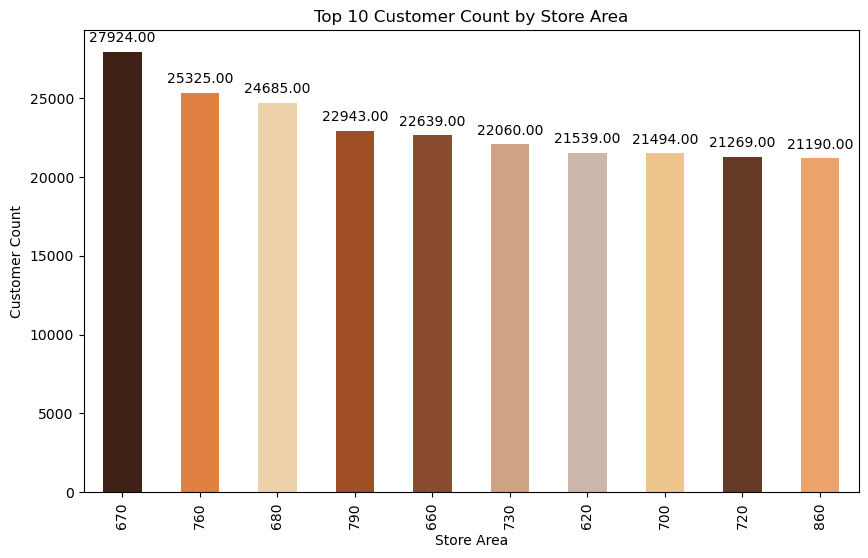

In [35]:
# Get the top 10 results by store area
top_10_by_customer_count = customer_count_by_store.nlargest(10)

# Plot the top 10 results
fig, ax = plt.subplots(figsize=(10, 6))
top_10_by_customer_count.plot(kind='bar', ax=ax, color = ['#3f2115', '#e08041', '#edd1aa', '#a04e28', '#894b2e', '#d0a284', '#ccb6ac', '#ecc48c', '#643926', '#eca46c'])

# Add data labels to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set the labels and title
ax.set_xlabel('Store Area')
ax.set_ylabel('Customer Count')
ax.set_title('Top 10 Customer Count by Store Area')

# Show the plot
plt.show()

In [24]:
df.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


### items available, daily customer count, and store sales by store area

In [25]:
# Analyze items available, daily customer count, and store sales by store area
analysis_by_store_area = df.groupby('Store_Area').agg({
    'Items_Available': 'sum',
    'Daily_Customer_Count': 'mean',
    'Store_Sales': 'sum'
})
print("\nAnalysis by Store Area:")
print(analysis_by_store_area)


Analysis by Store Area:
            Items_Available  Daily_Customer_Count  Store_Sales
Store_Area                                                    
775                     932                1090.0        42530
780                     951                 790.0        25600
854                    1018                 660.0        77740
869                    1050                 850.0        52540
891                    1073                 630.0        67370
...                     ...                   ...          ...
2063                   2493                 810.0        51480
2067                   2492                 790.0        70230
2169                   2617                 600.0        67080
2214                   2647                 740.0        65900
2229                   2667                 660.0        87410

[583 rows x 3 columns]


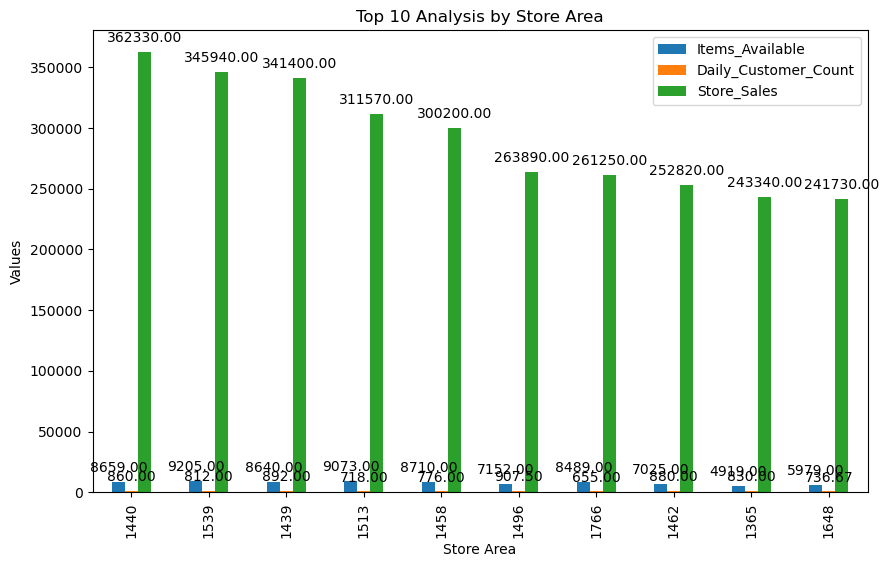

In [27]:
# Get the top 10 results by store area based on store sales
top_10_by_sales = analysis_by_store_area.nlargest(10, 'Store_Sales')

# Plot the top 10 results
fig, ax = plt.subplots(figsize=(10, 6))
top_10_by_sales.plot(kind='bar', ax=ax)

# Add data labels to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Set the labels and title
ax.set_xlabel('Store Area')
ax.set_ylabel('Values')
ax.set_title('Top 10 Analysis by Store Area')

# Show the plot
plt.show()